loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


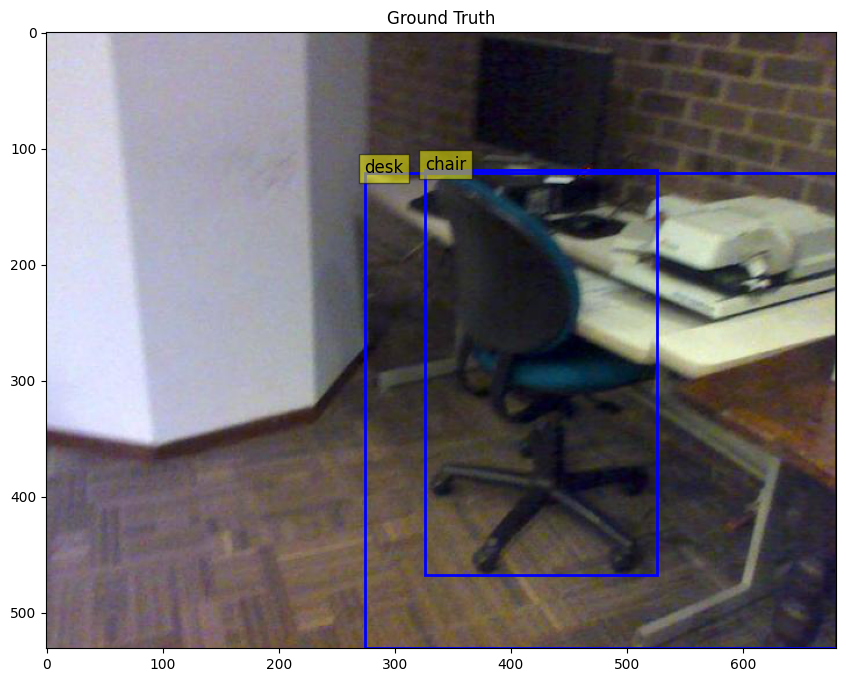

In [10]:
import torch
from PIL import Image
from pycocotools.coco import COCO
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

#Load the test data
test_ds = COCO('coco_dataset_test.json')

#Load the category names
NYU40CLASSES = ['void',
                'wall', 'floor', 'cabinet', 'bed', 'chair',
                'sofa', 'table', 'door', 'window', 'bookshelf',
                'picture', 'counter', 'blinds', 'desk', 'shelves',
                'curtain', 'dresser', 'pillow', 'mirror', 'floor_mat',
                'clothes', 'ceiling', 'books', 'refridgerator', 'television',
                'paper', 'towel', 'shower_curtain', 'box', 'whiteboard',
                'person', 'night_stand', 'toilet', 'sink', 'lamp',
                'bathtub', 'bag', 'otherstructure', 'otherfurniture', 'otherprop']

# Create a dictionary that maps category IDs to category names
id_to_name = {i: name for i, name in enumerate(NYU40CLASSES)}

# Select a random image from the dataset
img_id = random.choice(list(test_ds.imgs.keys()))
img_info = test_ds.loadImgs(img_id)[0]
im = Image.open(img_info['file_name']).convert('RGB')

# Get the ground truth bounding boxes and their categories for this image
gt_annotations = test_ds.loadAnns(test_ds.getAnnIds(img_id))
gt_boxes = [ann['bbox'] for ann in gt_annotations]
gt_classes = [ann['category_id'] for ann in gt_annotations]

#check if any void class is present
if 0 in gt_classes:
    print("Image contains void class")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Draw the image and the ground truth bounding boxes on the first subplot
ax.imshow(im)
for box, category_id in zip(gt_boxes, gt_classes):
    rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    ax.text(box[0], box[1], id_to_name[category_id], fontsize=12,
                bbox=dict(facecolor='yellow', alpha=0.5))
ax.set_title('Ground Truth')

plt.show()